In [1]:
import pandas as pd
import numpy as np

In [2]:
telecom_churn = pd.read_csv('C:/Users/DELL/Downloads/telecom_churn_data.csv')

In [3]:
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom_churn.shape

(99999, 226)

In [5]:
month_specific_cols = [col for col in telecom_churn.columns if '6' in col]
month_specific_cols_data = telecom_churn[month_specific_cols]
round((month_specific_cols_data.isnull().sum(axis=0)/month_specific_cols_data.shape[0])*100, 2)

last_date_of_month_6         0.00
arpu_6                       0.00
onnet_mou_6                  3.94
offnet_mou_6                 3.94
roam_ic_mou_6                3.94
roam_og_mou_6                3.94
loc_og_t2t_mou_6             3.94
loc_og_t2m_mou_6             3.94
loc_og_t2f_mou_6             3.94
loc_og_t2c_mou_6             3.94
loc_og_mou_6                 3.94
std_og_t2t_mou_6             3.94
std_og_t2m_mou_6             3.94
std_og_t2f_mou_6             3.94
std_og_t2c_mou_6             3.94
std_og_mou_6                 3.94
isd_og_mou_6                 3.94
spl_og_mou_6                 3.94
og_others_6                  3.94
total_og_mou_6               0.00
loc_ic_t2t_mou_6             3.94
loc_ic_t2m_mou_6             3.94
loc_ic_t2f_mou_6             3.94
loc_ic_mou_6                 3.94
std_ic_t2t_mou_6             3.94
std_ic_t2m_mou_6             3.94
std_ic_t2f_mou_6             3.94
std_ic_t2o_mou_6             3.94
std_ic_mou_6                 3.94
total_ic_mou_6

In [6]:
non_month_specific_cols = [col for col in telecom_churn.columns if '6' not in col and '7' not in col and '8' not in col and '9' not in col]
non_month_specific_cols_data = telecom_churn[non_month_specific_cols]
round((non_month_specific_cols_data.isnull().sum(axis=0)/non_month_specific_cols_data.shape[0])*100, 2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
dtype: float64

In [7]:
cols_high_missing = ["date_of_last_rech_data_8","total_rech_data_8","max_rech_data_8","count_rech_2g_8", 
                     "count_rech_3g_8","av_rech_amt_data_8", "fb_user_8", "night_pck_user_8", "arpu_2g_8",
                     "arpu_3g_8",
                     "date_of_last_rech_data_9","total_rech_data_9",
                     "max_rech_data_9","count_rech_2g_9", "count_rech_3g_9","av_rech_amt_data_9",
                     "fb_user_9", "night_pck_user_9", "arpu_2g_9",
                     "arpu_3g_9",
                     "date_of_last_rech_data_6","total_rech_data_6","max_rech_data_6","count_rech_2g_6", 
                     "count_rech_3g_6","av_rech_amt_data_6","fb_user_6", "night_pck_user_6", "arpu_2g_6",
                     "arpu_3g_6",
                     "date_of_last_rech_data_7","total_rech_data_7","max_rech_data_7","count_rech_2g_7", 
                     "count_rech_3g_7","av_rech_amt_data_7", "fb_user_7", "night_pck_user_7", "arpu_2g_7",
                     "arpu_3g_7"]       

telecom_churn = telecom_churn.drop(columns=cols_high_missing, axis=1)

In [8]:

#We drop the data for all the remaining 
for missing_data_col in telecom_churn.columns[telecom_churn.isnull().any()]:
    telecom_churn = telecom_churn[~telecom_churn[missing_data_col].isnull()]

In [9]:
telecom_churn.shape

(84185, 186)

In [10]:
#Check for missing value columns again.

telecom_churn.columns[telecom_churn.isnull().any()]


Index([], dtype='object')

In [11]:
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,0,0,0,0,1006,0.0,0.0,0.00,0.0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,0,0,0,0,1103,0.0,0.0,4.17,0.0
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,0,0,0,0,2491,0.0,0.0,0.00,0.0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0,0,0,0,1526,0.0,0.0,0.00,0.0
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,0,0,0,0,1471,0.0,0.0,0.00,0.0


In [12]:
interested_columns = ["mobile_number", 
                      "total_rech_num_6","total_rech_amt_6", "max_rech_amt_6", "date_of_last_rech_6",
                      "max_rech_amt_7", "date_of_last_rech_7", "total_rech_num_7", "total_rech_amt_7"
                     ]
telecom_churn[interested_columns].sort_values(["total_rech_amt_6","total_rech_amt_7"],ascending=[0,0]).head()

,mobile_number,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,max_rech_amt_7,date_of_last_rech_7,total_rech_num_7,total_rech_amt_7
38610,7001150960,29,35190,3100,6/25/2014,3100,7/30/2014,17,40335
33019,7002226643,9,18500,3000,6/27/2014,3000,7/22/2014,9,19000
51314,7000777972,43,17840,1119,6/30/2014,1050,7/31/2014,45,16725
67717,7002155380,71,13096,350,6/30/2014,3100,7/30/2014,26,19204
98208,7001719918,73,12795,300,6/30/2014,250,7/31/2014,47,7735


In [13]:
telecom_churn["avg_rech_first_2_months"] = (telecom_churn["total_rech_amt_6"] + telecom_churn["total_rech_amt_7"])/(telecom_churn["total_rech_num_6"]+telecom_churn["total_rech_num_7"])
# telecom_churn["avg_rech_first_2_months"].sort_values(["avg_rech_first_2_months"],ascending=[0]).head()

In [14]:
telecom_churn["avg_rech_first_2_months"].head()

1    35.230769
2    53.666667
3    25.714286
4    49.636364
5    30.000000
Name: avg_rech_first_2_months, dtype: float64

In [15]:
#Figure out the 70% quantile.
telecom_churn["avg_rech_first_2_months"].quantile(0.7)

57.0

In [16]:

telecom_churn_filtered =  telecom_churn[telecom_churn["avg_rech_first_2_months"] > 56.38751753155677]


In [17]:
telecom_churn_filtered.shape

(25673, 187)

In [18]:
telecom_churn_filtered[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
9,412.63,151.33,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0
19,50.38,25.31,0.0,0.0
20,240.93,293.83,0.0,0.0


In [20]:
condition_list = [((telecom_churn_filtered["total_ic_mou_9"] == 0) & 
                   (telecom_churn_filtered["total_og_mou_9"] == 0) & 
                   (telecom_churn_filtered["vol_2g_mb_9"] == 0) &
                   (telecom_churn_filtered["vol_3g_mb_9"] == 0)),
                  ((telecom_churn_filtered["total_ic_mou_9"] !=0) | 
                   (telecom_churn_filtered["total_og_mou_9"] !=0) | 
                   (telecom_churn_filtered["vol_2g_mb_9"] !=0) |
                   (telecom_churn_filtered["vol_3g_mb_9"] !=0))
                 ]
choice_list = [1,0]
telecom_churn_filtered["churn"] = np.select(condition_list, choice_list)

<ipython-input-20-55d4e21b0bce>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_churn_filtered["churn"] = np.select(condition_list, choice_list)


In [21]:
#Verify churn variable
telecom_churn_filtered[telecom_churn_filtered["churn"]==1][["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
199,0.0,0.0,0.0,0.0
229,0.0,0.0,0.0,0.0
590,0.0,0.0,0.0,0.0
594,0.0,0.0,0.0,0.0
691,0.0,0.0,0.0,0.0


In [22]:
#Drop all the 9th month columns now
ninth_month_cols = [col for col in telecom_churn.columns if '_9' in col]
telecom_churn_final = telecom_churn_filtered.drop(columns=ninth_month_cols, axis=1)

In [23]:

telecom_churn_final.shape

(25673, 144)

In [24]:
telecom_churn_final.columns.to_series().groupby(telecom_churn_final.dtypes).groups

{int32: ['churn'], int64: ['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon'], float64: ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 

In [25]:
telecom_churn_final["last_date_of_month_6"] = pd.to_datetime(telecom_churn_final["last_date_of_month_6"])
telecom_churn_final["last_date_of_month_7"] = pd.to_datetime(telecom_churn_final["last_date_of_month_7"])
telecom_churn_final["last_date_of_month_8"] = pd.to_datetime(telecom_churn_final["last_date_of_month_8"])
telecom_churn_final["date_of_last_rech_6"] = pd.to_datetime(telecom_churn_final["date_of_last_rech_6"])
telecom_churn_final["date_of_last_rech_7"] = pd.to_datetime(telecom_churn_final["date_of_last_rech_7"])
telecom_churn_final["date_of_last_rech_8"] = pd.to_datetime(telecom_churn_final["date_of_last_rech_8"])

In [26]:
#3 new columns for days since recharge.
telecom_churn_final["days_since_recharge_6"] = telecom_churn_final["last_date_of_month_6"] - telecom_churn_final["date_of_last_rech_6"]
telecom_churn_final["days_since_recharge_7"] = telecom_churn_final["last_date_of_month_7"] - telecom_churn_final["date_of_last_rech_7"]
telecom_churn_final["days_since_recharge_8"] = telecom_churn_final["last_date_of_month_8"] - telecom_churn_final["date_of_last_rech_8"]

In [27]:
telecom_churn_final["days_since_recharge_6"] = telecom_churn_final["days_since_recharge_6"].dt.days
telecom_churn_final["days_since_recharge_7"] = telecom_churn_final["days_since_recharge_7"].dt.days
telecom_churn_final["days_since_recharge_8"] = telecom_churn_final["days_since_recharge_8"].dt.days

In [28]:

date_columns_to_be_dropped = ["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8", 
                              "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]
telecom_churn_final = telecom_churn_final.drop(columns=date_columns_to_be_dropped)

In [29]:
telecom_churn_final.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_first_2_months,churn,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8
9,7001864400,109,0.0,0.0,0.0,119.518,247.435,170.231,33.89,30.11,...,902,0.00,0.00,0.00,0.0,69.166667,0,1,8,2
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,2607,0.00,0.00,0.00,0.0,76.000000,0,10,9,1
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,511,0.00,2.45,21.89,0.0,57.375000,0,0,0,17
19,7001754084,109,0.0,0.0,0.0,163.430,241.218,326.920,4.04,7.38,...,1104,454.53,466.06,0.00,0.0,89.600000,0,3,6,5
20,7001028254,109,0.0,0.0,0.0,271.699,421.474,364.251,72.41,86.73,...,3108,1.11,0.22,0.00,0.0,85.875000,0,16,21,4


In [30]:
telecom_churn_final["circle_id"].value_counts()

109    25673
Name: circle_id, dtype: int64

In [31]:
telecom_churn_remove_mob_circ = telecom_churn_final.drop(columns=["mobile_number","circle_id"])

In [32]:
#Drop all the columns that only have a 0.
for col in telecom_churn_remove_mob_circ.columns:
    if ((telecom_churn_remove_mob_circ[col].max()==0) & (telecom_churn_remove_mob_circ[col].min()==0)):
        print(col)

loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


In [33]:
cols_to_be_removed = ["loc_og_t2o_mou", "std_og_t2o_mou","loc_ic_t2o_mou",
                      "std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8",
                      "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8"]
telecom_churn_final = telecom_churn_remove_mob_circ.drop(columns=cols_to_be_removed)

In [34]:
churn_column = telecom_churn_final["churn"]
telecom_churn_final = telecom_churn_final.drop(columns=["churn"])
telecom_churn_final = ((telecom_churn_final-telecom_churn_final.mean())/telecom_churn_final.std())

In [35]:
telecom_churn_final = pd.concat([telecom_churn_final,churn_column], axis=1)

In [36]:

pd.options.display.max_columns = 4000
telecom_churn_final.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_first_2_months,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn
count,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,2.567300e+04,25673.000000
mean,-3.032248e-15,4.638983e-15,-3.478310e-15,-1.154339e-14,-6.343416e-15,-5.772438e-15,-2.276619e-14,-2.214380e-14,-2.325816e-14,-9.541981e-16,8.047679e-16,-1.242626e-15,-1.373426e-15,-2.824294e-16,-1.083991e-15,1.120124e-14,1.356046e-14,9.112134e-15,1.792931e-14,1.297171e-14,1.694692e-14,9.309174e-15,7.900046e-15,8.031635e-15,-8.076437e-16,1.737471e-15,7.914291e-16,-1.892337e-14,-1.819553e-14,-2.197267e-14,6.89

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Divide the data to Train and Test
training_data, testing_data = train_test_split(telecom_churn_final, train_size=0.7, test_size=0.3)

In [39]:
    
Y_train = training_data["churn"]
training_data.pop("churn")

94678    0
26182    0
85672    0
16974    0
44558    0
        ..
95509    0
25941    0
46817    1
37651    0
80821    0
Name: churn, Length: 17971, dtype: int32

In [40]:
X_train = training_data

In [41]:
Y_train.head()

94678    0
26182    0
85672    0
16974    0
44558    0
Name: churn, dtype: int32

In [43]:
# Use PCA
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA(svd_solver="randomized", random_state=42)
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [44]:
pca.components_

array([[ 1.89430228e-01,  1.95296289e-01,  1.87079579e-01, ...,
        -8.84607731e-02, -8.35809653e-02, -7.53490096e-02],
       [-2.00314916e-02, -3.12840407e-02, -1.81120989e-02, ...,
         4.07864950e-02,  4.00648953e-02,  4.65360546e-02],
       [ 1.51908161e-01,  1.70659929e-01,  1.64070578e-01, ...,
         2.88861356e-02,  1.95668680e-02,  1.13753784e-02],
       ...,
       [-2.21696531e-07,  2.97125449e-07,  7.31390849e-08, ...,
         8.60064231e-08, -4.26249029e-08,  2.32361530e-08],
       [ 8.90474255e-08,  3.87842361e-07,  3.67668793e-07, ...,
        -2.20271382e-08, -2.74053380e-08, -4.53659444e-08],
       [-3.70816415e-07,  3.03247554e-07,  9.30643379e-08, ...,
        -1.76931090e-09, -3.61167374e-08, -5.85015997e-08]])

In [45]:
pca.explained_variance_ratio_

array([1.23215947e-01, 8.36680398e-02, 5.94750458e-02, 4.62911671e-02,
       4.03859206e-02, 3.32500391e-02, 3.01923389e-02, 2.62735836e-02,
       2.52813169e-02, 2.43220511e-02, 2.31960507e-02, 2.30130238e-02,
       2.07360192e-02, 1.94297071e-02, 1.79651613e-02, 1.73052153e-02,
       1.59293168e-02, 1.40839919e-02, 1.38046139e-02, 1.30844956e-02,
       1.18658393e-02, 1.15907977e-02, 1.11524398e-02, 1.02760984e-02,
       9.93333114e-03, 9.64295068e-03, 9.43741353e-03, 9.27742931e-03,
       8.57553273e-03, 8.22746515e-03, 7.90521986e-03, 7.55892700e-03,
       7.28068803e-03, 7.13987316e-03, 7.08550544e-03, 6.68949789e-03,
       6.51526298e-03, 6.22887611e-03, 6.18112559e-03, 5.78620332e-03,
       5.63065367e-03, 5.61636220e-03, 5.45004867e-03, 5.26984866e-03,
       5.18432371e-03, 5.01444575e-03, 4.94447820e-03, 4.81676496e-03,
       4.64238016e-03, 4.56170117e-03, 4.22327668e-03, 4.14462333e-03,
       3.96328246e-03, 3.89152085e-03, 3.65488175e-03, 3.57337833e-03,
      

In [46]:
np.cumsum(pca.explained_variance_ratio_)

array([0.12321595, 0.20688399, 0.26635903, 0.3126502 , 0.35303612,
       0.38628616, 0.4164785 , 0.44275208, 0.4680334 , 0.49235545,
       0.5155515 , 0.53856452, 0.55930054, 0.57873025, 0.59669541,
       0.61400063, 0.62992994, 0.64401394, 0.65781855, 0.67090305,
       0.68276889, 0.69435968, 0.70551212, 0.71578822, 0.72572155,
       0.7353645 , 0.74480192, 0.75407935, 0.76265488, 0.77088234,
       0.77878756, 0.78634649, 0.79362718, 0.80076705, 0.80785256,
       0.81454206, 0.82105732, 0.82728619, 0.83346732, 0.83925352,
       0.84488418, 0.85050054, 0.85595059, 0.86122044, 0.86640476,
       0.87141921, 0.87636368, 0.88118045, 0.88582283, 0.89038453,
       0.89460781, 0.89875243, 0.90271571, 0.90660723, 0.91026212,
       0.91383549, 0.91733394, 0.92068504, 0.92396509, 0.9272059 ,
       0.93019129, 0.93304074, 0.93580162, 0.93853558, 0.94124376,
       0.94382706, 0.94633336, 0.94881485, 0.95125908, 0.95365334,
       0.95600154, 0.95824242, 0.96047161, 0.96267813, 0.96484

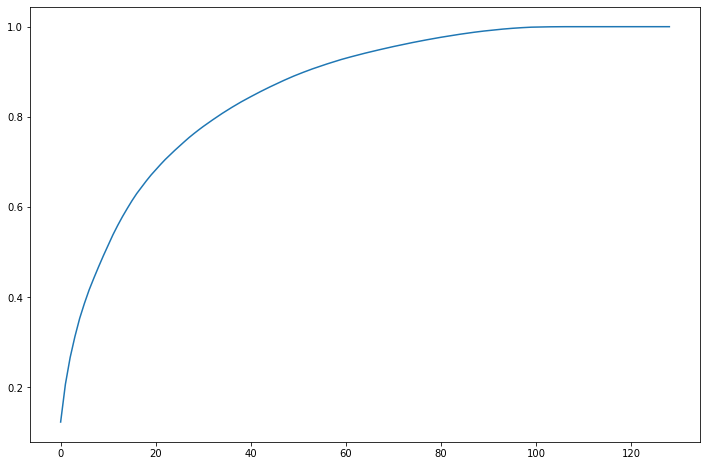

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [48]:
from sklearn.decomposition import IncrementalPCA

In [49]:
pca = IncrementalPCA(n_components=40)

In [50]:
X_train_pca = pca.fit_transform(X_train)

In [51]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
model_pca = logistic_regression.fit(X_train_pca,Y_train)

In [52]:

Y_test = testing_data["churn"]
testing_data.pop("churn")
X_test = testing_data

In [53]:
X_test_pca = pca.fit_transform(X_test)

In [54]:
Y_test_predict = model_pca.predict(X_test_pca)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_predict, Y_test)

0.9685795897169567